In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import cv2
from sklearn.svm import SVC
from matplotlib import gridspec
from sklearn.linear_model import SGDClassifier

In [4]:
path = "Desktop/AI_KASHIR/"

In [5]:
X = []
i=0
n = 80
size = (160, 160)

In [6]:
while(i != n):
    file = "Image_id"+str(i)+".png"
    file_path = path + file
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,size)
    X.append(img)
    i+=1

In [7]:
len(X)

80

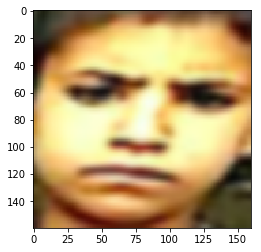

In [9]:
plt.imshow(X[7])

In [10]:
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    samples = np.expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)
    return yhat[0]

In [11]:
model = load_model("Desktop/facenet_keras.h5/model/facenet_keras.h5")
print('Loaded Model')

Instructions for updating:
Colocations handled automatically by placer.
Loaded Model


/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
new_X = []
for i in range(len(X)):
    new_X.append(get_embedding(model,X[i]))
    if(i%10 == 0):
        print("=",end="")

In [21]:
y_train = []
for i in range(len(X)):
    y_train.append("Image_id"+str(i))

In [22]:
np.shape(new_X)

(80, 128)

In [23]:
len(y_train)

80

In [24]:
y_train = np.array(y_train)

In [30]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [14]:
normal = Normalizer(norm="l2")

In [15]:
new_norm_X = normal.fit_transform(new_X)

In [32]:
svc = SVC(kernel="linear", probability= True)

In [33]:
svc.fit(new_norm_X,y_train)

SVC(kernel='linear', probability=True)

In [43]:
y_pred = svc.predict(new_norm_X)

In [44]:
y_pred

array([ 0,  1, 12, 23, 34, 45, 56, 67, 78, 79,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [45]:
y_train

array([ 0,  1, 12, 23, 34, 45, 56, 67, 78, 79,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [46]:
score_train = accuracy_score(y_train, y_pred)


In [50]:
print("Accuracy = ",score_train*100,"%")

Accuracy =  100.0 %
